# Reproducing FiveThirtyEight Bar Plot Result on Flying Etiquette

I first know about the flying-etiquette dataset from DataCamp, where I learned how to apply the R package, **tidyverse**, on categorical data. In this case, the data is a survey of 1,040 fliers whom where asked if certain flying behaviors are rude. Interestingly, there is no column with numerical values.  The lines of code are learned from the DataCamp course, Categorical Data in the **tidyverse**, which was taught by Emily Robinson. See <https://learn.datacamp.com/courses/categorical-data-in-the-tidyverse>. 

The article titled <em>41 Percent Of Fliers Think You’re Rude If You Recline Your Seat</em> can be found here <https://fivethirtyeight.com/features/airplane-etiquette-recline-seat/>, and the data can be found <https://github.com/fivethirtyeight/data/tree/master/flying-etiquette-survey>.

The main goal from this DataCamp course was to use **tidyverse**, **forcats**, and **ggplot2** packages to reproduce the bar chart appeared in the article. The bar chart produced from the course, however, differs from the *FiveThirtyEight* article in that the question marks were not removed. To ensure the same look of the bar chart, I added an additional line of code to remove the question marks.


The code below first converts variables in characters to factors and identifies columns (questions) that contains the word *rude*. Then, words and symbols unrelated to rude behaviors are removed. Finally, it plots the bar chart that one sees in the *FiveThirtyEight* article.

Note that using read_csv function from **tidyverse** will give us clean read of the data. I used the default read.csv on the flying data, which results each variable/column/question whose words are connected by periods. For example, the phrase *Is it rude* would be *Is.it.rude* using read.csv. When this happened, I tried remove the periods with str_remove and str_replace functions from **tidyverse** but did not succeed. Consequently, I went back to read_csv function. 

In [15]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(forcats)
library(ggthemes)
options(warn = -1)

In [17]:
# Read flying-etiquette data
flying = read_csv('flying-etiquette.csv')
options(warn = -1)

Parsed with column specification:
cols(
  .default = col_character(),
  RespondentID = col_double()
)
See spec(...) for full column specifications.


In [19]:
# Convert character-type variables to factor-type variables.
gathered_data <- flying %>%
mutate_if(is.character, as.factor) %>%
# remove observations where fliers said they don't fly often
filter(`How often do you travel by plane?` != "Never") %>%
# Select columns containing "rude"
select(contains('rude')) %>%
# Change format from wide to long
gather(response_var,value)


rude_behaviors <- gathered_data %>%
mutate(response_var = str_replace(response_var, '.*rude to ', '')) %>%
mutate(response_var = str_replace(response_var, 'on a plane', '')) %>%
mutate(response_var = str_replace(response_var, '\\?','')) %>%
# Remove rows that are NA in the value column
filter(!is.na(value)) %>%
mutate(rude = if_else(value %in% c("No, not rude at all", "No, not at all rude"), 0, 1)) %>%
# Group by response_var
group_by(response_var) %>%
# Create perc_rude, the percent considering each behavior rude
summarize(perc_rude = mean(rude))
  
suppressMessages(rude_behaviors)



`summarise()` ungrouping output (override with `.groups` argument)


response_var,perc_rude
ask someone to switch seats with you in order to be closer to family,0.1705882
ask someone to switch seats with you in order to be closer to friends,0.2576471
bring a baby,0.3027091
knowingly bring unruly children,0.8268551
move to an unsold seat,0.1929825
recline your seat,0.4121780
say more than a few words tothe stranger sitting next to you,0.2105263
wake a passenger up if you are trying to go to the bathroom,0.3705882
wake a passenger up if you are trying to walk around,0.7341176


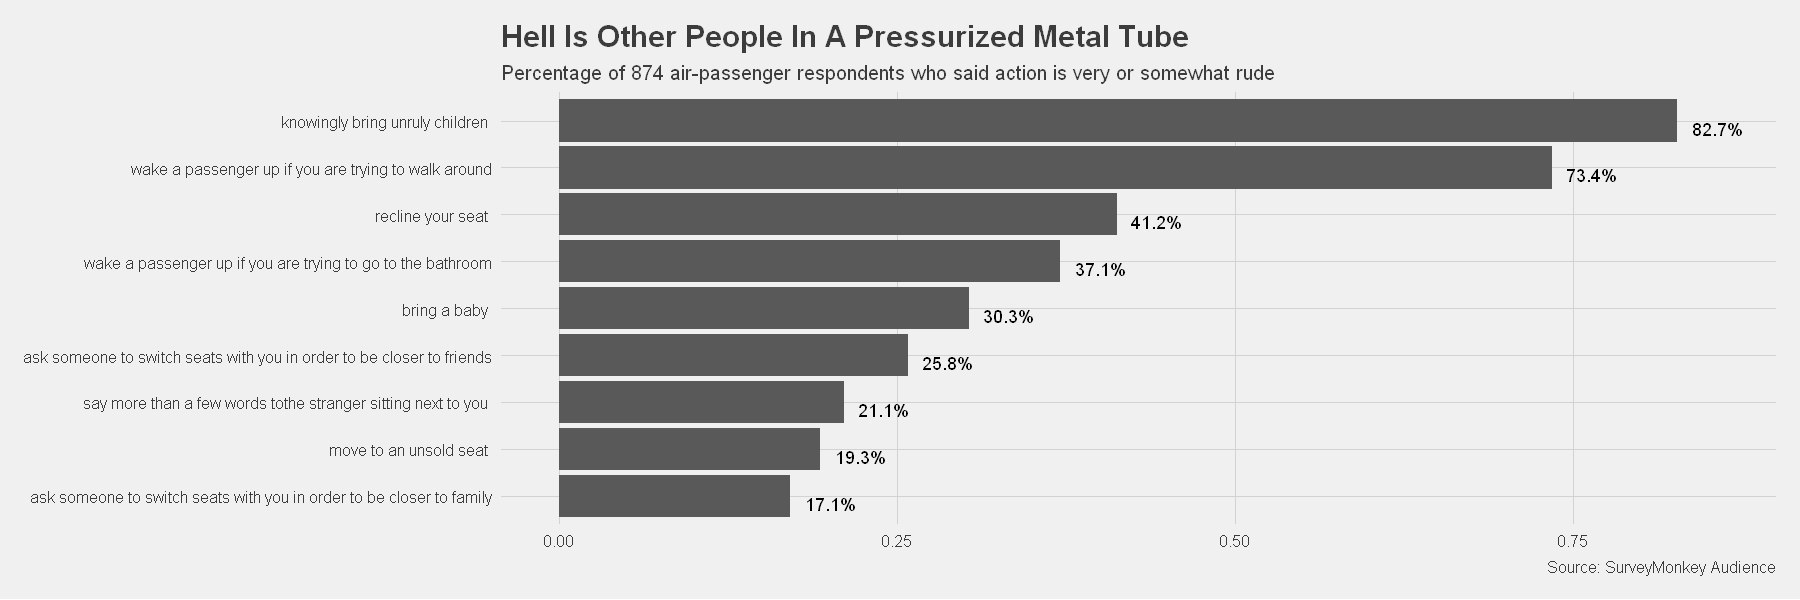

In [24]:
options(repr.plot.width = 15, repr.plot.height = 5)


initial_plot <- rude_behaviors %>%
# reorder response_var by perc_rude
mutate(response_var = fct_reorder(response_var, perc_rude)) %>%
# make a bar plot of perc_rude by response_var
ggplot(aes(x = response_var,y=perc_rude)) + 
geom_col()

#initial_plot

titled_plot <- initial_plot + 
# Add the title, subtitle, and caption
labs(title = "Hell Is Other People In A Pressurized Metal Tube",
subtitle = "Percentage of 874 air-passenger respondents who said action is very or somewhat rude",
caption = "Source: SurveyMonkey Audience", 
# Remove the x- and y-axis labels
x = "", 
y = "") 

#titled_plot

flipped_plot <- titled_plot + 
# Flip the axes
coord_flip() + 
# Remove the x-axis ticks and labels
theme(axis.text.x = element_blank(), 
axis.ticks.x = element_blank())
#flipped_plot

flipped_plot + 
# Apply percent() to perc_rude to label above the bar with the perc value
geom_text(aes(label = scales::percent(perc_rude), 
y = perc_rude + .03), 
position = position_dodge(0.9),
vjust = 1)+
theme_fivethirtyeight()
